<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общаяя-информация-о-данных" data-toc-modified-id="Общаяя-информация-о-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общаяя информация о данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Анализ предпочтений пользователей в авиакомпании

Компания «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Проведем анализ предпочтений пользователей, покупающих билеты на те или иные направления.

## Общаяя информация о данных

По результатам запросов из предыдущих заданий мы получили 2 таблицы:
    Количество рейсов для каждой модели самолетов в сентябре 2018 года
    Среднее количество рейсов, прибывающих в город за день в августе 2018 года.

Импортируем необходимые для анализа библиотеки. Откроем файлы и изучим общую информацию.

In [66]:
import pandas as pd

In [67]:
model = pd.read_csv('/datasets/query_1.csv')
city = pd.read_csv('/datasets/query_3.csv')
a = [model, city]
for i in a:
    print(i.info())
    print(i.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None
             model  flights_amount
0  Airbus A319-100             607
1  Airbus A321-200             960
2   Boeing 737-300             630
3   Boeing 767-300             600
4   Boeing 777-300             300
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None
          city  average_flights
0       Абакан         3.870968
1      Анадырь         1.000000
2        Анапа         2.161290
3  Архангельск         5.354839
4    Астрахань         2.451613


### Вывод

Данные предоставлены ввиде 2-х таблиц.
Таблица Model содержит 8 строк и 2 столбца. Пропущенных значений нет, форматы столбцов верные. 
Таблица City содержит 101 строку и 2 столбца. Пропущенных значений нет, форматы столбцов верные. 

## Предобработка данных

Проверим все ли наименования в столбцах уникальны.

In [70]:
len(city['city'].unique())

101

In [71]:
len(model['model'].unique())

8

### Вывод

Задвоений названий нет, количество названий совпадает с количеством строк.

## Исследовательский анализ данных

Сформируем топ-10 городов по количеству рейсов.

In [72]:
top10 = city.sort_values(by = 'average_flights', ascending = False).head(10)
top10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Построим графики по полученным таблицам.

Модели самолетов и количество рейсов

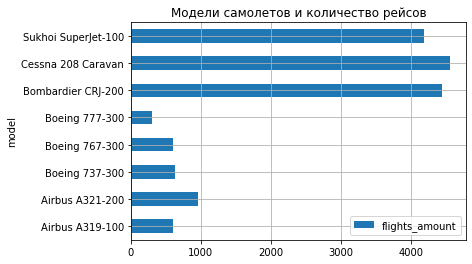

In [73]:
model.plot(x = 'model', kind = 'barh', title = 'Модели самолетов и количество рейсов', grid = True)

На первом месте по числу перелетов в сентябре 2018 года находится модель Cessna 2008 Caravan, лёгкий американский турбовинтовой одномоторный самолёт малой вместимости. На втором Bombardier CRJ-200, базовая модель семейства региональных реактивных самолетов, число пассажтиров до 50-ти. На третьем месте sukhoi superjet-100, российский ближнемагистральный узкофюзеляжный пассажирский самолёт, предназначенный для перевозки от 87 до 108 пассажиров на дальность до 4600 км. Самолеты компаний Boeing и  Airbus занимают последние 5 строк по числу рейсов в сентябре 2018 года.
Лидирующие позиции Cessna 2008 Caravan можно объяснить частными авиаперовозками, и перелетами на небольшие расстояния между городами/поселками в северных частях страны, где отсутсвует жд сообщение и затруднены автоперевозки. 
Bombardier CRJ-200 и sukhoi superjet-100 отлично подходят для междугородних перелетов небольшой дальности, например по центральной России. Пассажирский салон от 50 до 100 кресел закрывает потребности пассажиров.
Boeing и  Airbus производят дорогие самолеты. Это в первую очередь сказывается на их популярности. Российские авиакомпании не могут приобрести большое количество самолетов данных моделей. Так же имеет значение количество пассажирских мест. Например что бы перевести 185 пассажиров нужен 1 - airbus a321 или 12 - Cessna 2008 Caravan. 

Города и количество рейсов

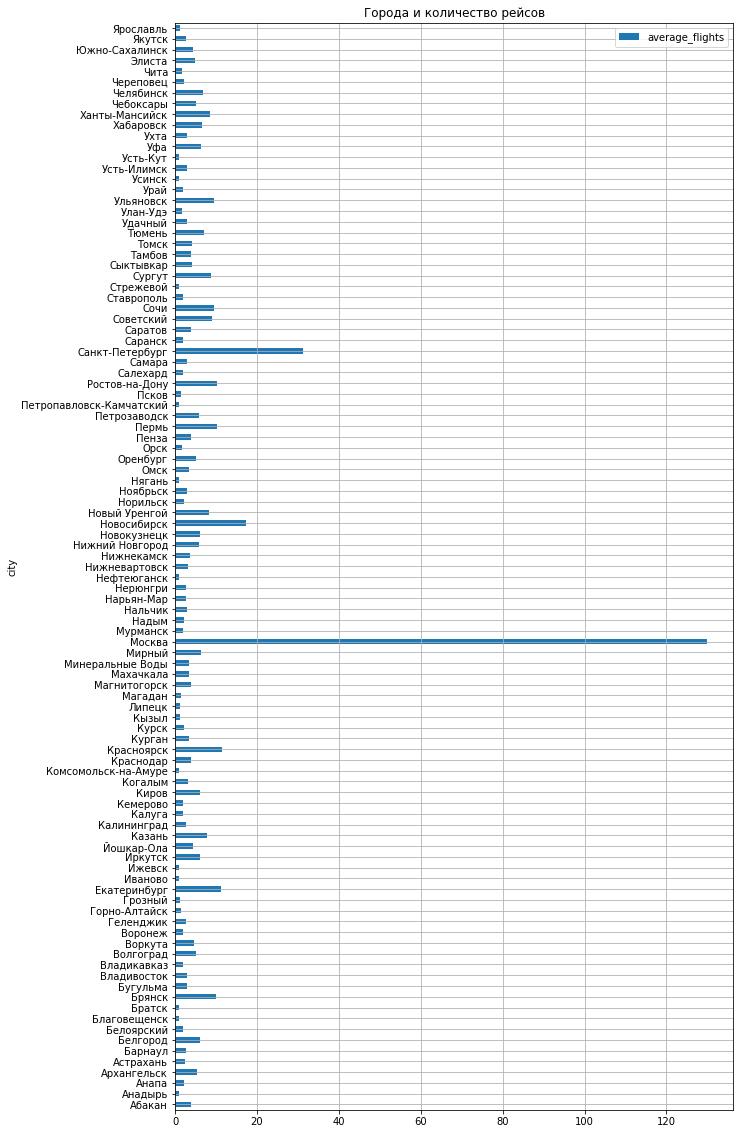

In [74]:
city.plot(x = 'city', kind = 'barh', title = 'Города и количество рейсов', grid = True, figsize = (10,20))

In [75]:
city.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


По графику "Города и количество рейсов" видно насколько Москва выделяется среди других городов страны. Москва - транспортный узел страны, многие авиакомпании базируются именно в Москве. В регионах зачастую отсутвуют прямые международные перелеты, и осуществляются они через Москву. По данным росстата в 2018 году в Москве проживало порядка 12 млн человек, и это не считая области. 
Остальные 100 городов заметно отстают от Москвы. Медиана средних перелетов в сутки в августе 2018 года составляет 3 рейса. 

Построим график для 10 городов, лидирующих по среднему количеству перелетов в сутки в августе 2018 года.

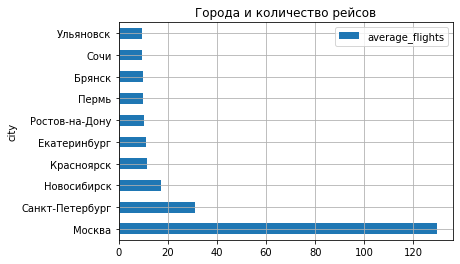

In [76]:
top10.plot(x = 'city', kind = 'barh', title = 'Города и количество рейсов', grid = True)

Причины популярности Москвы разобраны в предыдушем пункте, рассмотрим другие города из 10-ки.

Санкт-Петерург, вторая столица, популярное туристическое направление. 

Новосибирск - транспортный узел Сибири, один из хабов для крупней авиакомпании S7.

Красноярск, Екатеринбург, Пермь - крупные города, за пределами центральной России, собирают авиапоток с близлейжащих регионов. 

Ростов-на-Дону - город миллионник, так же сказывается пограничное положение с Украиной, куда запрешены прямые перелеты. 
Брянск - близость к границе Украины. 

Сочи - популярное туристическое направление. 

Ульяновск - возможно связано с китайскими туристами, так как Ульяновск входит в так называемый "Красный маршрут" по городам, связанным с вождем мировой революции В.И.Лениным

### Вывод

По анализу графиков мы выяснили, что по количеству рейсов лидируют самолеты малой и средней вместимости: Cessna 2008 Caravan, Bombardier CRJ-200, Sukhoi superjet-100. А среди городов чаще всего летают в Москву, Санкт-Петербург и Новосибирск.

## Общий вывод

В рамках данной части исследования нами были более подробно изучены результаты запросов из предыдущих заданий: количество рейсов для каждой модели самолетов в сентябре 2018 года и среднее количество рейсов, прибывающих в город за день в августе 2018 года.

На первом месте по числу перелетов находится модель Cessna 2008 Caravan, на втором Bombardier CRJ-200, на третьем месте Sukhoi Superjet-100. Российские пользователи пердпочитают самолеты малой и средней вместимости со средней дальностью полета. 

По количеству рейсов, прибывающих в среднем в город за день лидирует Москва. Примерно 130 рейсов в сутки. Многомиллионное население города и области, центральное расположение, наличие 4-х крупнейщих пассажирских аэропортов страны, все это выводит Москву на первое место с огромным отрывом от остальных.

На втором месте Санкт-Петербург, на третьем Новосибирск. При этом медиана средних перелетов в сутки в августе 2018 года составляет всего 3 рейса. 

Изучив первую 10-ку городов по средним перелетам в сутки, можно выделить города-хабы: Москва, Санкт-Петребург, Красноярск, Екатеринбург, Пермь. Прямое авиасообщение доступно только в крупных городах и жителям регионов приходится летать с пересадками. 
Пограничные города с Украиной Ростов-на-Дону и Брянск. И туристические направления Сочи и Ульяноск. 

Планируя будующие авиаперевозки необходимо учитывать все вышеперечисленные факторы. Выбирать популярные города и модели самолетов.